<a href="https://colab.research.google.com/github/BR-Lab/ML-algorithm/blob/main/Logistic_regression_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression 실습

## 0.Introduction

<분석 모델>
*   병원 환자에 대한 정보와 유방암 진단 여부를 기록한 dataset을 이용
*   환자정보 + 유방암 확진여부 -> logistic regression model -> <br>1. $\beta$ 해석 s.t. $logit = \beta_0 + \sum_k \beta_kX_k$ <br> 2. 성능파악 i.e. cut-off 값에 따른 혼동행력 파악 & ROC curve 관찰




## 1.import module

In [1]:
#!pip install sklearn

#유방암 진단결과 데이터 패키지
from sklearn.datasets import load_breast_cancer

#데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#ML model 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

## 2.데이터 불러오기

###2.1 data description

<데이터 구조>


*   데이터 : 병원 환자에 대한 정보와 유방암 진단 여부
*   관측치 개수: 569개
*   변수 개수: 33개(설명변수:30개, 반응변수:2개, ID)


In [2]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
print(breast_cancer.feature_names)
print(breast_cancer.target_names) # "0" : malignant(유방암), "1" : benign(유방암 아님)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
# 데이터 처리의 용이함을 위해 유방암이 아닐경우 0, 유방암일 경우 1로 target data 값 변경
breast_cancer.target = np.where(breast_cancer.target==0,1,0)

## 3.데이터 전처리

train, test set 나누기 & data 컬럼 단위 정규화


In [5]:
# train, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target, test_size=0.2, random_state=2021)

# data 컬럼 단위 정규화
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

## 4.Logistic Regression model 구축

### 4.1 model 학습하기


In [6]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###4.2 $\beta$ 확인하기

$logit = log(odds) = log(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_0 + \sum_{k=1}^{30} \beta_kX_k = \beta^TX$
####odds : 승산, p:성공확률
<br><br>



*   $\beta_k : X_k가 1 단위 증가하였 때, logit 값의 변화량$
*   $e^{\beta_k} : X_k가 1 단위 증가하였 때, e^logit = Odds 값의 변화량$


*   $\beta_k>0$ → Odds  1 이상 증가 → P(Y=1)가 급증 → risky
*   $\beta_k<0$ → Odds  1 미만 증가 → P(Y=1)가 급증  x → protective





In [7]:
model.intercept_

array([-0.1992979])

In [8]:
model.coef_

array([[ 0.37096736,  0.41051466,  0.35046564,  0.46768724,  0.25240315,
        -0.71820671,  0.84742235,  0.84227137, -0.1670077 , -0.2488281 ,
         1.28547044, -0.16042844,  0.65688025,  1.00746061,  0.17569625,
        -0.58372272, -0.13336591,  0.27870888, -0.36638299, -0.45579971,
         0.92635364,  1.22842328,  0.74646489,  0.96541038,  0.71827683,
        -0.12267536,  0.80842499,  0.98835978,  1.06163438,  0.11583561]])

In [9]:
#데이터 결정에 따른 beta, exp(beta) 체크
column_name = ['const'] + breast_cancer.feature_names.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # constant를 하나로 합치고 소수점 2째자리까지 반올림
odds = np.exp(beta).round(2)
interpret = np.where(beta>0, 'risky', 'protective')

#beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index=column_name, columns=['beta', 'odds', 'interpret'])
beta_analysis

,beta,odds,interpret
const,-0.2,0.82,protective
mean radius,0.37,1.45,risky
mean texture,0.41,1.51,risky
mean perimeter,0.35,1.42,risky
mean area,0.47,1.6,risky
mean smoothness,0.25,1.28,risky
mean compactness,-0.72,0.49,protective
mean concavity,0.85,2.34,risky
mean concave points,0.84,2.32,risky
mean symmetry,-0.17,0.84,protective


###4.3 test data 예측

$logit = log(odds) = log(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_0 + \sum_{k=1}^{30} \beta_kX_k = \beta^TX$
<br><br>$\qquad\qquad\qquad\qquad\qquad\qquad↓$<br><br>

$Odds = exp(\beta^TX) --- P(Y=1) = \frac{1}{1+exp(-\beta^TX)}$
<br>$\qquad\qquad\qquad\qquad\quad|$
<br>$ \qquad\qquad\qquad\qquad\quad-- P(Y=0) =\frac{exp(-\beta^TX)}{1+exp(-\beta^TX)}$

<br><br>
X_test에 대한 P(Y=0) 예측 확률값 & P(Y=1) 예측 확률값


1.   패키지 이용
2.   직접 계산


In [10]:
#1 패키지 이용
model.predict_proba(X_test)

array([[9.99079810e-01, 9.20189939e-04],
       [9.99665075e-01, 3.34924593e-04],
       [9.89958108e-01, 1.00418922e-02],
       [5.55111512e-15, 1.00000000e+00],
       [9.99971711e-01, 2.82888774e-05],
       [1.24470421e-01, 8.75529579e-01],
       [4.73083652e-07, 9.99999527e-01],
       [9.99540458e-01, 4.59541812e-04],
       [1.22424152e-05, 9.99987758e-01],
       [9.99983815e-01, 1.61852055e-05],
       [9.99998240e-01, 1.76025449e-06],
       [1.13373618e-05, 9.99988663e-01],
       [9.91106647e-01, 8.89335302e-03],
       [2.24620793e-04, 9.99775379e-01],
       [9.94867605e-01, 5.13239489e-03],
       [9.98909246e-01, 1.09075375e-03],
       [9.34789989e-01, 6.52100106e-02],
       [9.99942280e-01, 5.77201249e-05],
       [9.99888432e-01, 1.11567748e-04],
       [1.78352668e-03, 9.98216473e-01],
       [9.41513106e-01, 5.84868943e-02],
       [9.73689474e-01, 2.63105264e-02],
       [1.20167140e-03, 9.98798329e-01],
       [9.92033300e-01, 7.96670020e-03],
       [9.993223

In [11]:
#2 직접계산

##1. beta*X
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1,1))
##2. P(Y=1)
P_1 = 1/(1+np.exp(-Xbeta))

In [12]:
# 1&2 비교
pd.DataFrame(np.concatenate([P_1, model.predict_proba(X_test)[:,1].reshape(-1,1)], axis=1), columns = ['직접 계산', '패키지 이용'])

,직접 계산,패키지 이용
0,0.000903,0.000920
1,0.000330,0.000335
2,0.009805,0.010042
3,1.000000,1.000000
4,0.000027,0.000028
...,...,...
109,0.000096,0.000099
110,0.000086,0.000089
111,0.012833,0.012908
112,0.997022,0.997016


###4.4 성능 평가
1.   cut off 값에 따른 혼동행렬 관찰
2.   Roc curve 그리기

**분류/예측 모델의 유용성 측정 방법, ROC(Receiver Operating Characteristic) Curve 란?**
민감도와 특이도를 바탕으로 검사방법의 유용성이나 검사법의 기준치(Cut-off value)를 결정하기 위한 분석기법(모델 성능 평가 기법)

-------------------------------------------------------------
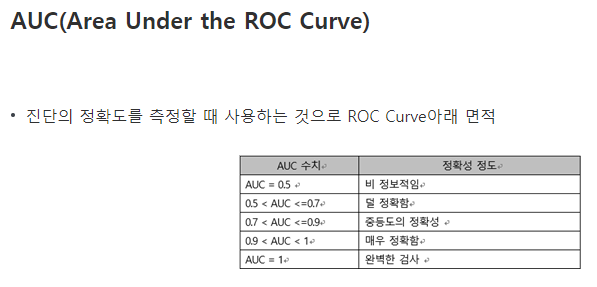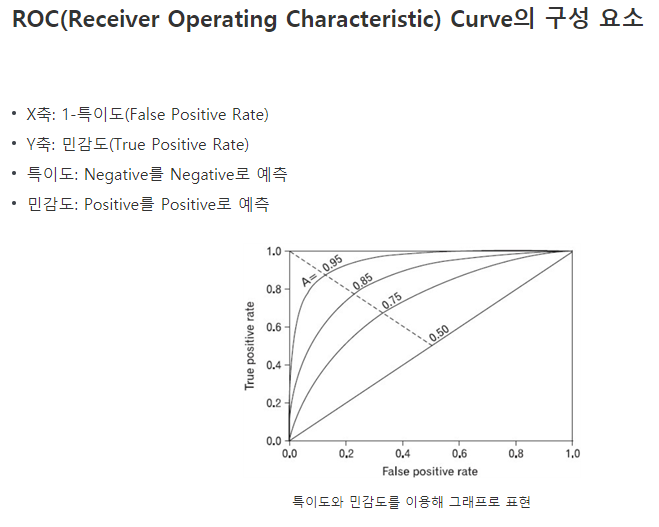


####4.4.1 cut off값에 따른 혼동행렬 관찰

Test data → Logistic Regression Model → P(Y=malignant) → 유방암 확진 or not

|혼돈행렬|예측Y=1|예측Y=0|
|:--------|-----------|-----------|
|실제Y=1|TP|FN|
|실제Y=0|FP|TN|


<br>
*   정확도 = $\frac{TP+TN}{TP+FN+FP+TN}$<br>
*   민감도 = $\frac{TP}{TP+FN}$<br>
*   정밀도 = $\frac{TP}{TP+FP}$







In [13]:
Cut_off = np.linspace(0.01, 0.99, 10)
for cut_off in Cut_off:
  y_pred = np.where(P_1.reshape(-1)>=cut_off,1,0)
  acc = accuracy_score(y_true = y_test, y_pred = y_pred)
  recall = recall_score(y_true = y_test, y_pred = y_pred)
  precision = precision_score(y_true = y_test, y_pred = y_pred)

  print(f"정확도:{acc:0.2f}", f"민감도:{recall:0.2f}", f"정밀도:{precision:0.2f}", f"cut off:{cut_off:0.2f}", sep='  |  ')

정확도:0.81  |  민감도:1.00  |  정밀도:0.66  |  cut off:0.01
정확도:0.93  |  민감도:0.98  |  정밀도:0.85  |  cut off:0.12
정확도:0.96  |  민감도:0.98  |  정밀도:0.93  |  cut off:0.23
정확도:0.96  |  민감도:0.98  |  정밀도:0.93  |  cut off:0.34
정확도:0.98  |  민감도:0.98  |  정밀도:0.98  |  cut off:0.45
정확도:0.98  |  민감도:0.95  |  정밀도:1.00  |  cut off:0.55
정확도:0.97  |  민감도:0.93  |  정밀도:1.00  |  cut off:0.66
정확도:0.97  |  민감도:0.93  |  정밀도:1.00  |  cut off:0.77
정확도:0.96  |  민감도:0.88  |  정밀도:1.00  |  cut off:0.88
정확도:0.92  |  민감도:0.79  |  정밀도:1.00  |  cut off:0.99


####4.4.2 Roc curve 그리기

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


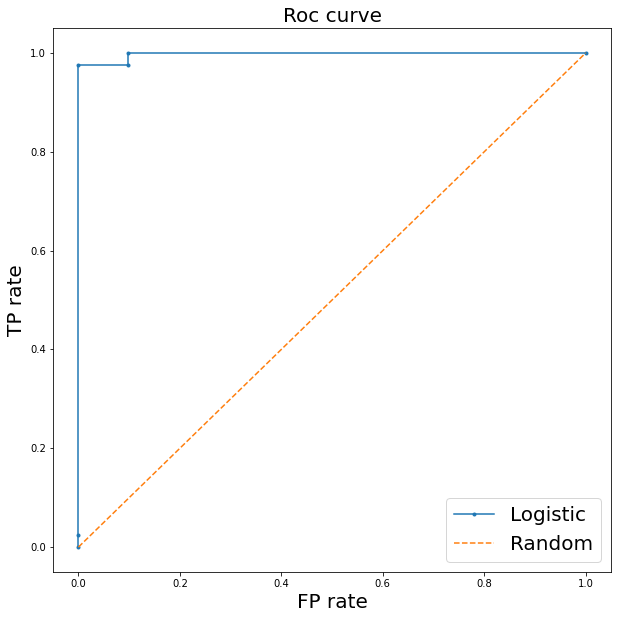

In [14]:
#X_test에 대한 예측확률 - 패키지 이용
probs = model.predict_proba(X_test)[:,1]  #두번째 column indexing

# Roc curve X축, Y축
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize=(10,10))
plt.plot(model_fpr, model_tpr, marker='.', label = 'Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label = 'Random')

# axis label
plt.xlabel('FP rate', size=20)
plt.ylabel('TP rate', size=20)

# show the legend
plt.legend(fontsize=20)

#show the plot
plt.title('Roc curve', size=20)
plt.show()

EOD